In [1]:
import pandas as pd

pr = pd.read_csv('HousePrices.csv')

pr.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
pd.options.display.max_rows = None

In [3]:
pr.shape

(2073, 81)

In [4]:
pr.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [5]:
len(pr.columns[pr.dtypes == 'object'])

43

In [6]:
pr.columns[pr.dtypes == 'object']

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [7]:
pr.columns[((pr.isnull().sum()/pr.shape[0])*100).round(2)>0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
pr.isnull().sum()/pr.shape[0]*100

Id                      0.000000
Dwell_Type              0.000000
Zone_Class              0.000000
LotFrontage            15.436565
LotArea                 0.000000
Road_Type               0.000000
Alley                  93.777135
Property_Shape          0.000000
LandContour             0.000000
Utilities               0.000000
LotConfig               0.000000
LandSlope               0.000000
Neighborhood            0.000000
Condition1              0.000000
Condition2              0.000000
Dwelling_Type           0.000000
HouseStyle              0.000000
OverallQual             0.000000
OverallCond             0.000000
YearBuilt               0.000000
YearRemodAdd            0.000000
RoofStyle               0.000000
RoofMatl                0.000000
Exterior1st             0.000000
Exterior2nd             0.000000
MasVnrType              0.675350
MasVnrArea              0.675350
ExterQual               0.000000
ExterCond               0.000000
Foundation              0.000000
BsmtQual  

In [9]:
# We drop Column Id since it is an unique identifier

pr = pr.drop(['FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature', 'Id', 'Alley'], axis = 1)
pr.shape

(2073, 75)

In [10]:

pr.LotFrontage.fillna(pr.LotFrontage.mean(), inplace = True)
pr.MasVnrType.fillna('None', inplace = True)
pr.MasVnrArea.fillna(pr.MasVnrArea.mean(), inplace = True)
pr.BsmtQual.fillna('TA', inplace = True)
pr.BsmtCond.fillna('TA', inplace = True)
pr.BsmtExposure.fillna('No', inplace = True)
pr.BsmtFinType1.fillna('Unf', inplace = True)
pr.BsmtFinType2.fillna('Unf', inplace = True)
pr.Electrical.fillna('S8rkr', inplace = True)
pr.GarageType.fillna('Attchd', inplace = True)
pr.GarageYrBlt.fillna(pr.GarageYrBlt.mean(), inplace = True)
pr.GarageFinish.fillna('Unf', inplace = True)
pr.GarageQual.fillna('TA', inplace = True)
pr.GarageCond.fillna('TA', inplace = True)

In [11]:
Year_features = [feature for feature in pr.columns if  'Yr' in feature or 'Year'in feature]
Year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:
# The year entity has to be handeled sepearately as a unique attribute instaed as values/numbers 
for vals in Year_features :
    print('Feature  : ', vals,len(pr[vals].unique()))

Feature  :  YearBuilt 117
Feature  :  YearRemodAdd 72
Feature  :  GarageYrBlt 103
Feature  :  YrSold 5


In [13]:
import numpy as np

for vals in Year_features :
    print('Feature  : ', vals,pr[vals].unique())
    print('Min : ',min(pr[vals].unique()), '25%:',np.quantile(pr[vals].unique(),0.25),
          '50%:',np.quantile(pr[vals].unique(),0.5),'75%:',np.quantile(pr[vals].unique(),0.75),'Max:',max(pr[vals].unique()),'\n')

Feature  :  YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905
 1902 1943 1944 1909 1903]
Min :  1872 25%: 1922.0 50%: 1952.0 75%: 1981.0 Max: 2010 

Feature  :  YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 195

In [14]:
# Categorize the YearBuilt column
pr.loc[pr['YearBuilt'] <= 1872, 'YearBuilt'] = 1
pr.loc[(pr['YearBuilt'] > 1872) & (pr['YearBuilt'] <= 1922), 'YearBuilt'] = 2
pr.loc[(pr['YearBuilt'] > 1922) & (pr['YearBuilt'] <= 1952), 'YearBuilt'] = 3
pr.loc[(pr['YearBuilt'] > 1952) & (pr['YearBuilt'] <= 1981), 'YearBuilt'] = 4
pr.loc[pr['YearBuilt'] > 1981, 'YearBuilt'] = 5

pr.YearBuilt.value_counts()

5    800
4    712
3    366
2    194
1      1
Name: YearBuilt, dtype: int64

In [15]:
# Categorize the YearRemodAdd column

# Min :  1950 25%: 1967.75 50%: 1985.5 75%: 2003.25 Max: 2023

pr.loc[pr['YearRemodAdd'] <= 1950, 'YearRemodAdd'] = 1
pr.loc[(pr['YearRemodAdd'] > 1950) & (pr['YearRemodAdd'] <= 1967), 'YearRemodAdd'] = 2
pr.loc[(pr['YearRemodAdd'] > 1967) & (pr['YearRemodAdd'] <= 1985), 'YearRemodAdd'] = 3
pr.loc[(pr['YearRemodAdd'] > 1985) & (pr['YearRemodAdd'] <= 2003), 'YearRemodAdd'] = 4
pr.loc[pr['YearRemodAdd'] > 2003, 'YearRemodAdd'] = 5

pr.YearRemodAdd.value_counts()

4    659
5    584
3    354
2    253
1    223
Name: YearRemodAdd, dtype: int64

In [16]:
# Categorize the GarageYrBlt column

# Min :  1906.0 25%: nan 50%: nan 75%: nan Max: 2019.0

pr.loc[pr['GarageYrBlt'] <= 1906, 'GarageYrBlt'] = 1
pr.loc[(pr['GarageYrBlt'] > 1906) & (pr['GarageYrBlt'] <= 1922), 'GarageYrBlt'] = 2
pr.loc[(pr['GarageYrBlt'] > 1922) & (pr['GarageYrBlt'] <= 1952), 'GarageYrBlt'] = 3
pr.loc[(pr['GarageYrBlt'] > 1952) & (pr['GarageYrBlt'] <= 1981), 'GarageYrBlt'] = 4
pr.loc[pr['GarageYrBlt'] > 1981, 'GarageYrBlt'] = 5

pr.GarageYrBlt.value_counts()

5.0    1009
4.0     814
3.0     206
2.0      43
1.0       1
Name: GarageYrBlt, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

pr[pr.select_dtypes(include = ['object']).columns] = pr[pr.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

In [18]:
# We'll make sure none of our columns have Object Datatype

pr.columns[pr.columns.dtype != 'object']

array([], shape=(0, 75), dtype=object)

In [19]:
# Lets analyse our Target variable

pr.Property_Sale_Price.describe().round(3)
np.median(pr.Property_Sale_Price).round(3)

163990.0

In [20]:
# Since we need to perform Logistic Regression over this Dataset we will categorize our Target Variable to 
# High n Low based on 50% or Median of Property_sale_PRice Column 


pr.loc[pr['Property_Sale_Price'] <= 163989, 'Property_Sale_Price'] = 0 # Low Price
pr.loc[(pr['Property_Sale_Price'] > 163989) & (pr['Property_Sale_Price'] >= 163990), 'Property_Sale_Price'] = 1 # High Price

pr.Property_Sale_Price.value_counts()

1    1037
0    1036
Name: Property_Sale_Price, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

pr_train, pr_test = train_test_split(pr, test_size =.2)

pr_train_x = pr_train.iloc[ : , 0:-1]
pr_train_y = pr_train.iloc[ : , -1]

pr_test_x = pr_test.iloc[ : , 0:-1]
pr_test_y = pr_test.iloc[ : , -1]

In [22]:
from sklearn.linear_model import LogisticRegression

prl = LogisticRegression()

prl.fit(pr_train_x, pr_train_y)

C:\Users\siddhikag\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

pr_pred_y = prl.predict(pr_test_x)

ConfusionMatrix = confusion_matrix(pr_test_y, pr_pred_y) 
print('ConfusionMatrix')
print(ConfusionMatrix,'\n')

AccuracyScore = prl.score(pr_test_x, pr_test_y)
print('AccuracyScore',(AccuracyScore*100).round(2),'\n')

PresionScore = precision_score(pr_test_y, pr_pred_y)
print('PresionScore',(PresionScore*100).round(2),'\n')

Recall_Score = recall_score(pr_test_y, pr_pred_y)
print('Recall_Score',(Recall_Score*100).round(2),'\n')

F1_score = f1_score(pr_test_y, pr_pred_y)
print('F1_score',(F1_score*100).round(2),'\n')

Roc_Scr = roc_auc_score(pr_test_y, pr_pred_y)
print('Roc_Scr',(Roc_Scr*100).round(2))

ConfusionMatrix
[[170  30]
 [ 38 177]] 

AccuracyScore 83.61 

PresionScore 85.51 

Recall_Score 82.33 

F1_score 83.89 

Roc_Scr 83.66


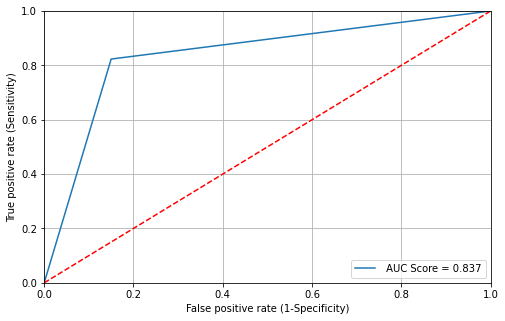

In [28]:
from sklearn.metrics import roc_curve
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(pr_test_y, pr_pred_y)

# plot the ROC curve
plt.plot(fpr,tpr,label=' AUC Score = %0.3f'%(Roc_Scr))

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.legend(loc='lower right')

plt.grid(True)